In [1]:
import torch.optim as optim
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 3)
        self.fc2 = nn.Linear(3, 3)
        self.fc3 = nn.Linear(3, 1)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [3]:
net = Net()
X = torch.randn(1000, 2)
y = torch.randn(1000, 1)

In [4]:
torch.save(net.state_dict(), './st.pth')

In [5]:
for p in net.parameters():
    print(p.size())

torch.Size([3, 2])
torch.Size([3])
torch.Size([3, 3])
torch.Size([3])
torch.Size([1, 3])
torch.Size([1])


In [6]:
filters = [torch.tensor([[1, 2], [1, 1], [1, 1]]), torch.tensor([1, 1, 1]),
           torch.tensor([[1, 1, 2], [1, 1, 1], [2, 2, 1]]), torch.tensor([1, 1, 1]),
           torch.tensor([[1, 1, 1]]), torch.tensor([1])]

In [7]:
for f in filters:
    print(f.size())

torch.Size([3, 2])
torch.Size([3])
torch.Size([3, 3])
torch.Size([3])
torch.Size([1, 3])
torch.Size([1])


In [8]:
from ElementwiseAdam import ElementWiseAdam
elementadam = ElementWiseAdam(net.parameters(), filters)

In [9]:
criterion = nn.MSELoss()

In [10]:
loss_history = []
for e in range(100):
    elementadam.zero_grad()
    prediction = net(X)
    loss = criterion(prediction, y)
    loss_history.append(loss.item())
    loss.backward()
    elementadam.step()

In [11]:
net = Net()
net.load_state_dict(torch.load('./st.pth', weights_only=True))

<All keys matched successfully>

In [12]:
adam = optim.Adam(net.parameters())
loss_history2 = []
for e in range(100):
    adam.zero_grad()
    prediction = net(X)
    loss = criterion(prediction, y)
    loss_history2.append(loss.item())
    loss.backward()
    adam.step()

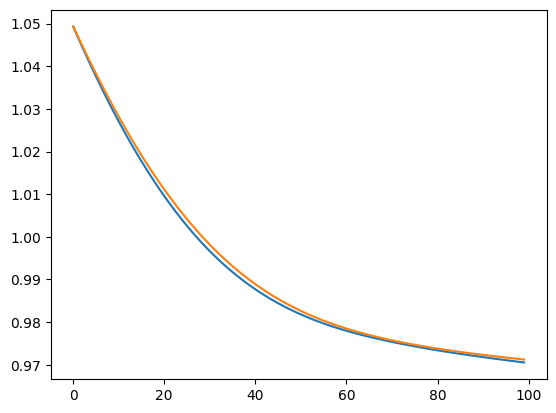

In [13]:
import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.plot(loss_history2)

In [14]:
adam.state_dict()['state']

{0: {'step': tensor(100.),
  'exp_avg': tensor([[ 7.5402e-03, -1.5731e-02],
          [ 8.9075e-04, -2.8863e-03],
          [ 1.2308e-05, -3.5565e-03]]),
  'exp_avg_sq': tensor([[1.2469e-05, 1.6098e-05],
          [5.7992e-07, 7.9653e-07],
          [6.0212e-07, 6.1301e-07]])},
 1: {'step': tensor(100.),
  'exp_avg': tensor([-0.0010,  0.0002, -0.0018]),
  'exp_avg_sq': tensor([5.4368e-05, 2.5456e-07, 1.8265e-06])},
 2: {'step': tensor(100.),
  'exp_avg': tensor([[ 0.0078,  0.0021,  0.0155],
          [-0.0039, -0.0008, -0.0095],
          [ 0.0055,  0.0015,  0.0109]]),
  'exp_avg_sq': tensor([[7.5401e-05, 3.1654e-07, 1.6652e-04],
          [2.8725e-05, 7.6666e-08, 1.0502e-04],
          [3.0338e-05, 1.4915e-07, 6.6977e-05]])},
 3: {'step': tensor(100.),
  'exp_avg': tensor([-0.0286,  0.0155, -0.0201]),
  'exp_avg_sq': tensor([0.0006, 0.0003, 0.0003])},
 4: {'step': tensor(100.),
  'exp_avg': tensor([[0.0285, 0.0363, 0.0203]]),
  'exp_avg_sq': tensor([[0.0031, 0.0026, 0.0006]])},
 5: {'

In [15]:
elementadam.state_dict()['param_groups']

[{'lr': 0.001,
  'betas': (0.9, 0.999),
  'eps': 1e-08,
  'bias_correction': True,
  'filters': [tensor([[1, 2],
           [1, 1],
           [1, 1]]),
   tensor([1, 1, 1]),
   tensor([[1, 1, 2],
           [1, 1, 1],
           [2, 2, 1]]),
   tensor([1, 1, 1]),
   tensor([[1, 1, 1]]),
   tensor([1])],
  'params': [0, 1, 2, 3, 4, 5]}]

In [78]:
adam.state_dict()['param_groups']

[{'lr': 0.001,
  'betas': (0.9, 0.999),
  'eps': 1e-08,
  'weight_decay': 0,
  'amsgrad': False,
  'maximize': False,
  'foreach': None,
  'capturable': False,
  'differentiable': False,
  'fused': None,
  'params': [0, 1, 2, 3, 4, 5]}]

In [16]:
st = adam.state_dict()

In [18]:
st['state']

{0: {'step': tensor(100.),
  'exp_avg': tensor([[ 7.5402e-03, -1.5731e-02],
          [ 8.9075e-04, -2.8863e-03],
          [ 1.2308e-05, -3.5565e-03]]),
  'exp_avg_sq': tensor([[1.2469e-05, 1.6098e-05],
          [5.7992e-07, 7.9653e-07],
          [6.0212e-07, 6.1301e-07]])},
 1: {'step': tensor(100.),
  'exp_avg': tensor([-0.0010,  0.0002, -0.0018]),
  'exp_avg_sq': tensor([5.4368e-05, 2.5456e-07, 1.8265e-06])},
 2: {'step': tensor(100.),
  'exp_avg': tensor([[ 0.0078,  0.0021,  0.0155],
          [-0.0039, -0.0008, -0.0095],
          [ 0.0055,  0.0015,  0.0109]]),
  'exp_avg_sq': tensor([[7.5401e-05, 3.1654e-07, 1.6652e-04],
          [2.8725e-05, 7.6666e-08, 1.0502e-04],
          [3.0338e-05, 1.4915e-07, 6.6977e-05]])},
 3: {'step': tensor(100.),
  'exp_avg': tensor([-0.0286,  0.0155, -0.0201]),
  'exp_avg_sq': tensor([0.0006, 0.0003, 0.0003])},
 4: {'step': tensor(100.),
  'exp_avg': tensor([[0.0285, 0.0363, 0.0203]]),
  'exp_avg_sq': tensor([[0.0031, 0.0026, 0.0006]])},
 5: {'

In [19]:
st['param_groups']

[{'lr': 0.001,
  'betas': (0.9, 0.999),
  'eps': 1e-08,
  'weight_decay': 0,
  'amsgrad': False,
  'maximize': False,
  'foreach': None,
  'capturable': False,
  'differentiable': False,
  'fused': None,
  'params': [0, 1, 2, 3, 4, 5]}]

In [20]:
elementadam.load_state_dict(st, filters=filters)

In [24]:
adam.state_dict()['state']

{0: {'step': tensor(100.),
  'exp_avg': tensor([[ 7.5402e-03, -1.5731e-02],
          [ 8.9075e-04, -2.8863e-03],
          [ 1.2308e-05, -3.5565e-03]]),
  'exp_avg_sq': tensor([[1.2469e-05, 1.6098e-05],
          [5.7992e-07, 7.9653e-07],
          [6.0212e-07, 6.1301e-07]])},
 1: {'step': tensor(100.),
  'exp_avg': tensor([-0.0010,  0.0002, -0.0018]),
  'exp_avg_sq': tensor([5.4368e-05, 2.5456e-07, 1.8265e-06])},
 2: {'step': tensor(100.),
  'exp_avg': tensor([[ 0.0078,  0.0021,  0.0155],
          [-0.0039, -0.0008, -0.0095],
          [ 0.0055,  0.0015,  0.0109]]),
  'exp_avg_sq': tensor([[7.5401e-05, 3.1654e-07, 1.6652e-04],
          [2.8725e-05, 7.6666e-08, 1.0502e-04],
          [3.0338e-05, 1.4915e-07, 6.6977e-05]])},
 3: {'step': tensor(100.),
  'exp_avg': tensor([-0.0286,  0.0155, -0.0201]),
  'exp_avg_sq': tensor([0.0006, 0.0003, 0.0003])},
 4: {'step': tensor(100.),
  'exp_avg': tensor([[0.0285, 0.0363, 0.0203]]),
  'exp_avg_sq': tensor([[0.0031, 0.0026, 0.0006]])},
 5: {'

In [25]:
elementadam.state_dict()['state']

{0: {'step': tensor(100.),
  'exp_avg': tensor([[ 7.5402e-03, -1.5731e-02],
          [ 8.9075e-04, -2.8863e-03],
          [ 1.2308e-05, -3.5565e-03]]),
  'exp_avg_sq': tensor([[1.2469e-05, 1.6098e-05],
          [5.7992e-07, 7.9653e-07],
          [6.0212e-07, 6.1301e-07]])},
 1: {'step': tensor(100.),
  'exp_avg': tensor([-0.0010,  0.0002, -0.0018]),
  'exp_avg_sq': tensor([5.4368e-05, 2.5456e-07, 1.8265e-06])},
 2: {'step': tensor(100.),
  'exp_avg': tensor([[ 0.0078,  0.0021,  0.0155],
          [-0.0039, -0.0008, -0.0095],
          [ 0.0055,  0.0015,  0.0109]]),
  'exp_avg_sq': tensor([[7.5401e-05, 3.1654e-07, 1.6652e-04],
          [2.8725e-05, 7.6666e-08, 1.0502e-04],
          [3.0338e-05, 1.4915e-07, 6.6977e-05]])},
 3: {'step': tensor(100.),
  'exp_avg': tensor([-0.0286,  0.0155, -0.0201]),
  'exp_avg_sq': tensor([0.0006, 0.0003, 0.0003])},
 4: {'step': tensor(100.),
  'exp_avg': tensor([[0.0285, 0.0363, 0.0203]]),
  'exp_avg_sq': tensor([[0.0031, 0.0026, 0.0006]])},
 5: {'

In [26]:
adam.state_dict()['param_groups']

[{'lr': 0.001,
  'betas': (0.9, 0.999),
  'eps': 1e-08,
  'weight_decay': 0,
  'amsgrad': False,
  'maximize': False,
  'foreach': None,
  'capturable': False,
  'differentiable': False,
  'fused': None,
  'params': [0, 1, 2, 3, 4, 5]}]

In [27]:
elementadam.state_dict()['param_groups']

[{'lr': 0.001,
  'betas': (0.9, 0.999),
  'eps': 1e-08,
  'weight_decay': 0,
  'amsgrad': False,
  'maximize': False,
  'foreach': None,
  'capturable': False,
  'differentiable': False,
  'fused': None,
  'filters': [tensor([[1, 2],
           [1, 1],
           [1, 1]]),
   tensor([1, 1, 1]),
   tensor([[1, 1, 2],
           [1, 1, 1],
           [2, 2, 1]]),
   tensor([1, 1, 1]),
   tensor([[1, 1, 1]]),
   tensor([1])],
  'params': [0, 1, 2, 3, 4, 5]}]

In [21]:
elementadam.param_groups

[{'lr': 0.001,
  'betas': (0.9, 0.999),
  'eps': 1e-08,
  'weight_decay': 0,
  'amsgrad': False,
  'maximize': False,
  'foreach': None,
  'capturable': False,
  'differentiable': False,
  'fused': None,
  'params': [Parameter containing:
   tensor([[-0.6192, -0.4558],
           [-0.1591, -0.3522],
           [ 0.6407, -0.6360]], requires_grad=True),
   Parameter containing:
   tensor([ 0.4442, -0.5695,  0.6616], requires_grad=True),
   Parameter containing:
   tensor([[ 0.2049,  0.3240,  0.2432],
           [-0.5815,  0.5362,  0.3662],
           [ 0.0058,  0.2136,  0.1128]], requires_grad=True),
   Parameter containing:
   tensor([0.5082, 0.5135, 0.3049], requires_grad=True),
   Parameter containing:
   tensor([[-0.3096,  0.1750, -0.2187]], requires_grad=True),
   Parameter containing:
   tensor([0.2828], requires_grad=True)],
  'filters': [tensor([[1, 2],
           [1, 1],
           [1, 1]]),
   tensor([1, 1, 1]),
   tensor([[1, 1, 2],
           [1, 1, 1],
           [2, 2, 1]])

In [22]:
elementadam.state_dict()['param_groups']

[{'lr': 0.001,
  'betas': (0.9, 0.999),
  'eps': 1e-08,
  'weight_decay': 0,
  'amsgrad': False,
  'maximize': False,
  'foreach': None,
  'capturable': False,
  'differentiable': False,
  'fused': None,
  'filters': [tensor([[1., 1.],
           [1., 1.],
           [1., 1.]]),
   tensor([1., 1., 1.]),
   tensor([[1., 1., 1.],
           [1., 1., 1.],
           [1., 1., 1.]]),
   tensor([1., 1., 1.]),
   tensor([[1., 1., 1.]]),
   tensor([1.])],
  'params': [0, 1, 2, 3, 4, 5]}]

In [23]:
elementadam.load_state_dict(st)

In [24]:
elementadam.state_dict()

{'state': {0: {'step': tensor(100.),
   'exp_avg': tensor([[-0.0020,  0.0010],
           [ 0.0066, -0.0044],
           [ 0.0087, -0.0014]]),
   'exp_avg_sq': tensor([[2.9240e-06, 1.1984e-07],
           [5.4722e-06, 1.8231e-06],
           [5.5205e-06, 9.4193e-07]])},
  1: {'step': tensor(100.),
   'exp_avg': tensor([ 0.0014, -0.0044,  0.0016]),
   'exp_avg_sq': tensor([1.9182e-06, 1.3342e-05, 1.5293e-06])},
  2: {'step': tensor(100.),
   'exp_avg': tensor([[ 0.0000,  0.0000,  0.0000],
           [-0.0036, -0.0032,  0.0126],
           [ 0.0001, -0.0004, -0.0038]]),
   'exp_avg_sq': tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
           [8.6013e-06, 3.6290e-05, 1.2628e-05],
           [5.2854e-10, 7.4078e-08, 8.2456e-07]])},
  3: {'step': tensor(100.),
   'exp_avg': tensor([ 0.0000, -0.0255,  0.0007]),
   'exp_avg_sq': tensor([0.0000e+00, 6.1774e-04, 1.4718e-07])},
  4: {'step': tensor(100.),
   'exp_avg': tensor([[ 0.0000, -0.0209,  0.0056]]),
   'exp_avg_sq': tensor([[0.0000e+00,

In [25]:
# Check filters after loading
for idx, group in enumerate(elementadam.param_groups):
    print(f"Parameter group {idx}:")
    for filter_tensor in group['filters']:
        print(filter_tensor)  

Parameter group 0:
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([1., 1., 1.])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([1., 1., 1.])
tensor([[1., 1., 1.]])
tensor([1.])


In [52]:
len(elementadam.param_groups)

1

In [49]:
elementadam.param_groups[0]['filters']

[tensor([[1., 1.],
         [1., 1.],
         [1., 1.]]),
 tensor([1., 1., 1.]),
 tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]),
 tensor([1., 1., 1.]),
 tensor([[1., 1., 1.]]),
 tensor([1.])]

In [28]:
for group in elementadam.param_groups:
    print(group)

{'lr': 0.001, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False, 'maximize': False, 'foreach': None, 'capturable': False, 'differentiable': False, 'fused': None, 'params': [Parameter containing:
tensor([[-0.2723, -0.1420],
        [ 0.0713, -0.1301],
        [ 0.6014, -0.1715]], requires_grad=True), Parameter containing:
tensor([-0.2024,  0.4612, -0.3235], requires_grad=True), Parameter containing:
tensor([[-0.1108, -0.2052, -0.0740],
        [-0.0597,  0.2081,  0.4251],
        [-0.6518,  0.4975,  0.1347]], requires_grad=True), Parameter containing:
tensor([-0.1657,  0.6159, -0.2419], requires_grad=True), Parameter containing:
tensor([[-0.4614,  0.5043, -0.1727]], requires_grad=True), Parameter containing:
tensor([-0.3873], requires_grad=True)], 'filters': tensor([[1, 2],
        [1, 1],
        [1, 1]])}


In [55]:
elementadam.param_groups[0]['filters'] = filters

In [56]:
elementadam.param_groups

[{'lr': 0.001,
  'betas': (0.9, 0.999),
  'eps': 1e-08,
  'weight_decay': 0,
  'amsgrad': False,
  'maximize': False,
  'foreach': None,
  'capturable': False,
  'differentiable': False,
  'fused': None,
  'params': [Parameter containing:
   tensor([[-0.7239, -0.6920],
           [-0.1990,  0.4715],
           [-0.5742,  0.5787]], requires_grad=True),
   Parameter containing:
   tensor([-0.1617, -0.2299,  0.2196], requires_grad=True),
   Parameter containing:
   tensor([[ 7.9701e-05, -1.1396e-01,  2.4272e-02],
           [ 2.9392e-01, -5.9884e-02,  7.4787e-02],
           [ 4.2970e-01,  4.3200e-01, -4.4187e-01]], requires_grad=True),
   Parameter containing:
   tensor([ 0.1641,  0.5122, -0.2619], requires_grad=True),
   Parameter containing:
   tensor([[-0.3303,  0.6101, -0.1998]], requires_grad=True),
   Parameter containing:
   tensor([-0.4128], requires_grad=True)],
  'filters': [tensor([[1, 2],
           [1, 1],
           [1, 1]]),
   tensor([1, 1, 1]),
   tensor([[1, 1, 2],
    

In [27]:
for idx, group in enumerate(elementadam.param_groups):
    print(f"Parameter group {idx}:")
    for filter_tensor in group['filters']:
        print(filter_tensor)  

Parameter group 0:
tensor([1, 2])
tensor([1, 1])
tensor([1, 1])
